In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install tensorflow==2.1.0
!pip install pillow

In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [2]:
train_dir = r'C:\Users\NICOLAS\Downloads\observations\experiements\data'
train_mask_dir = os.path.join(train_dir, 'with_mask')
train_no_mask_dir = os.path.join(train_dir, 'without_mask')


In [3]:
train_mask_fnames = os.listdir(train_mask_dir)
train_no_mask_fnames = os.listdir(train_no_mask_dir)
print(train_mask_fnames[:10])
print(train_no_mask_fnames[:10])

['0-with-mask.jpg', '1-with-mask.jpg', '10-with-mask.jpg', '100-with-mask.jpg', '101-with-mask.jpg', '103-with-mask.jpg', '104-with-mask.jpg', '105-with-mask.jpg', '106-with-mask.jpg', '107-with-mask.jpg']
['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg']


In [4]:
print('Total imagenes con mascara:', len(train_mask_fnames))
print('Total imagenes sin mascara:', len(train_no_mask_fnames))

Total imagenes con mascara: 690
Total imagenes sin mascara: 686


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3),activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    # Clasificacion binaria
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy', tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_height = 150
img_width = 150
batch_size = 10
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.2)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size=(img_height,img_width),
                                                        batch_size=batch_size,
                                                        class_mode='binary',
                                                        subset='validation')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [9]:
nb_epochs = 10
history = model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps= validation_generator.samples // batch_size,
    epochs=nb_epochs)

C:\Users\NICOLAS\.conda\envs\tfod\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
110/110 [==============================] - 24s 201ms/step - loss: 0.5457 - accuracy: 0.6946 - recall: 0.7033 - precision: 0.6773 - val_loss: 0.1426 - val_accuracy: 0.9593 - val_recall: 0.9704 - val_precision: 0.9493
Epoch 2/10
110/110 [==============================] - 19s 174ms/step - loss: 0.0989 - accuracy: 0.9707 - recall: 0.9701 - precision: 0.9733 - val_loss: 0.0835 - val_accuracy: 0.9741 - val_recall: 0.9927 - val_precision: 0.9577
Epoch 3/10
110/110 [==============================] - 17s 154ms/step - loss: 0.0689 - accuracy: 0.9801 - recall: 0.9849 - precision: 0.9729 - val_loss: 0.0380 - val_accuracy: 0.9778 - val_recall: 0.9776 - val_precision: 0.9776
Epoch 4/10
110/110 [==============================] - 17s 151ms/step - loss: 0.0439 - accuracy: 0.9795 - recall: 0.9717 - precision: 0.9863 - val_loss: 0.0611 - val_accuracy: 0.9741 - val_recall: 0.9850 - val_precision: 0.9632
Epoch 5/10
110/110 [==============================] - 18s 161ms/step - loss: 0.0373 - accura

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

rec = history.history['recall']
val_rec = history.history['val_recall']

prec= history.history['precision']
val_prec= history.history['val_precision']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))



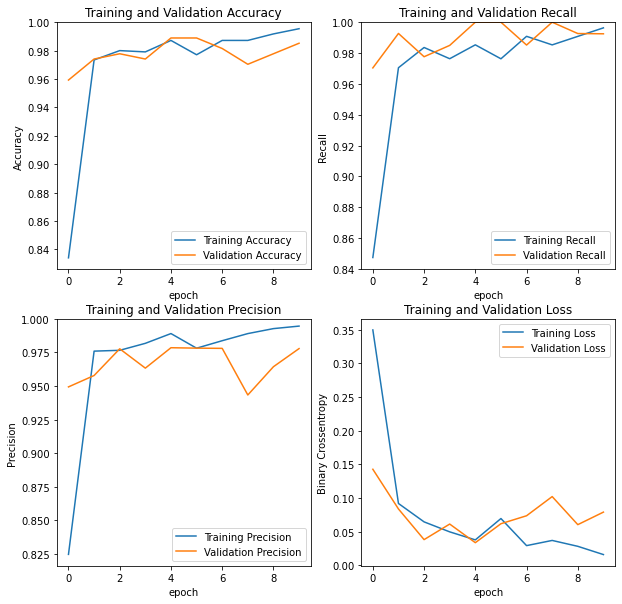

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

plt.subplot(2,2,2)
plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('epoch')

plt.subplot(2,2,3)
plt.plot(prec, label='Training Precision')
plt.plot(val_prec, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('epoch')

plt.subplot(2,2,4)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Binary Crossentropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('Modelo_tapabocas')
plt.show()


In [13]:
from tensorflow.keras.preprocessing import image
from PIL import Image

No Lleva mascara


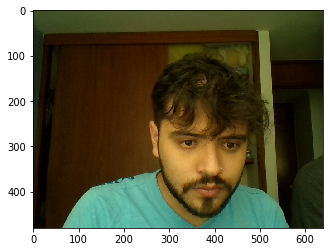

Si lleva mascara


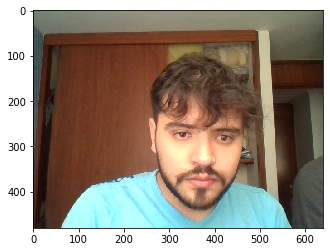

No Lleva mascara


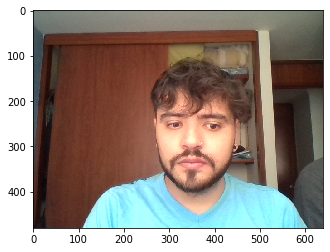

No Lleva mascara


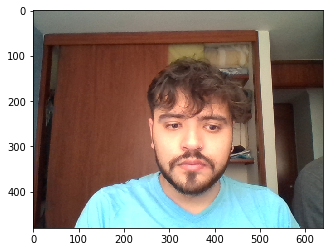

No Lleva mascara


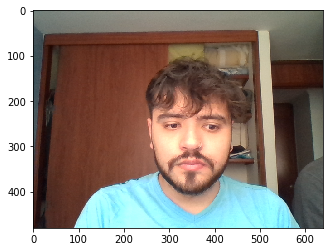

No Lleva mascara


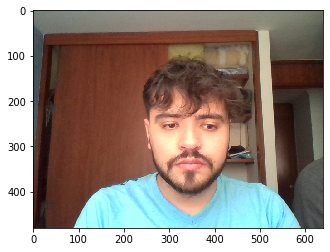

No Lleva mascara


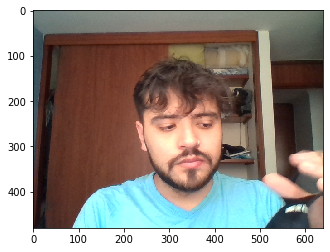

No Lleva mascara


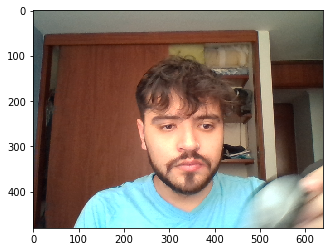

No Lleva mascara


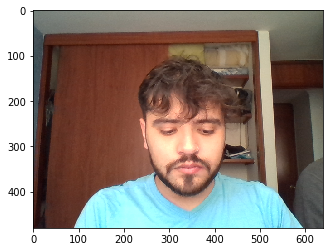

No Lleva mascara


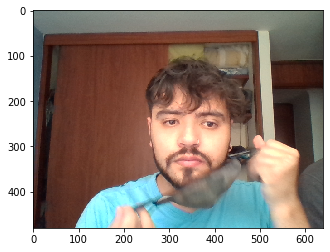

No Lleva mascara


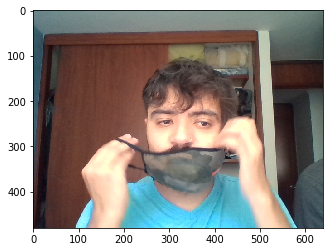

No Lleva mascara


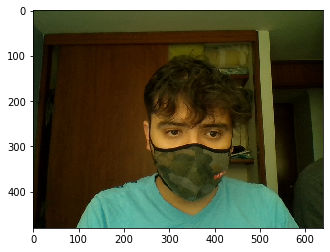

No Lleva mascara


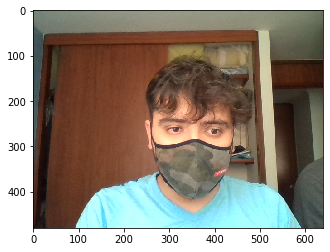

No Lleva mascara


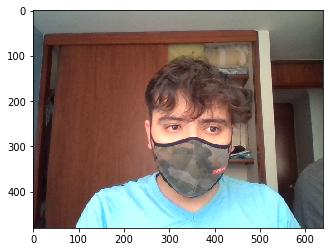

No Lleva mascara


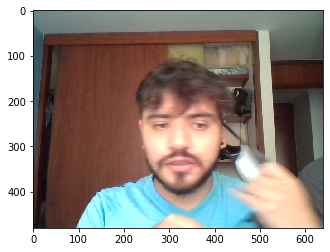

Si lleva mascara


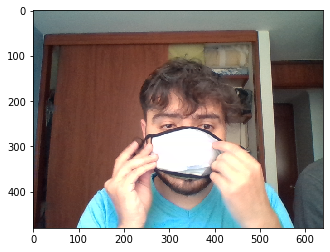

Si lleva mascara


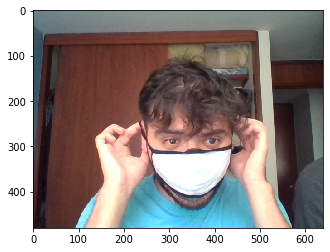

Si lleva mascara


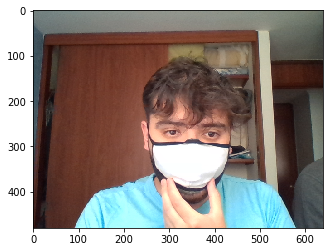

Si lleva mascara


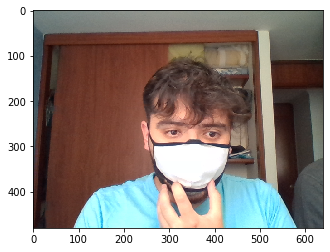

Si lleva mascara


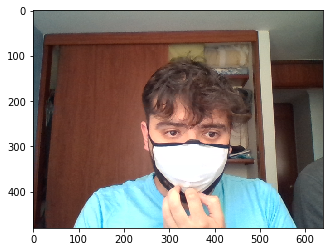

Si lleva mascara


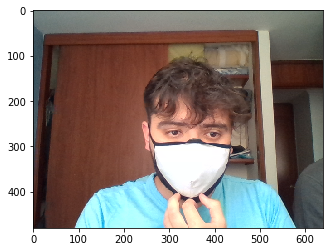

No Lleva mascara


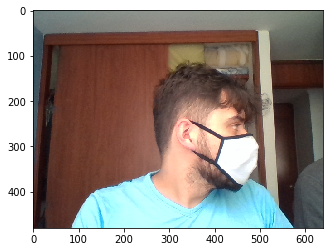

Si lleva mascara


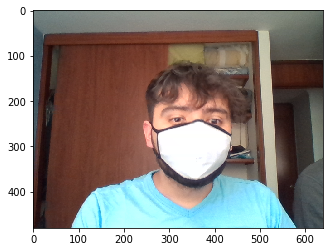

Si lleva mascara


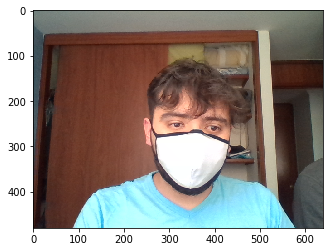

Si lleva mascara


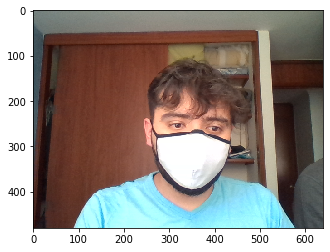

No Lleva mascara


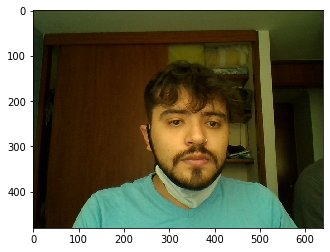

No Lleva mascara


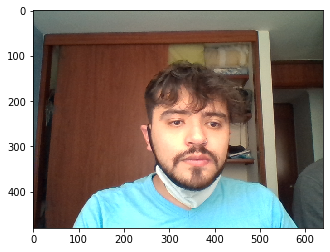

No Lleva mascara


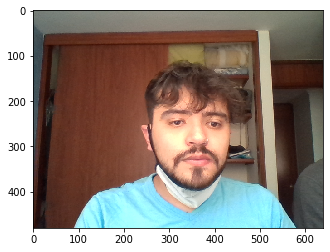

No Lleva mascara


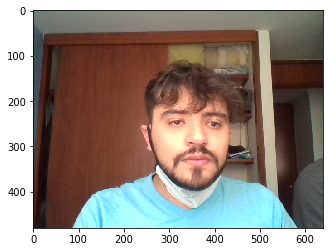

No Lleva mascara


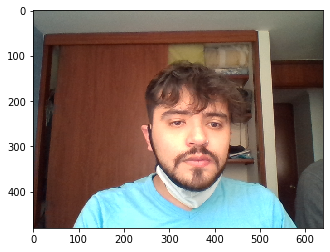

No Lleva mascara


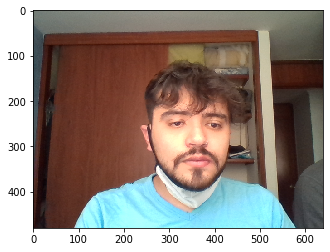

No Lleva mascara


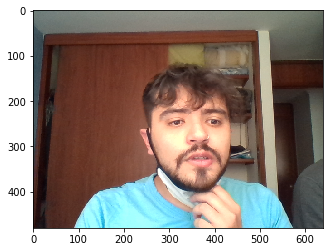

Si lleva mascara


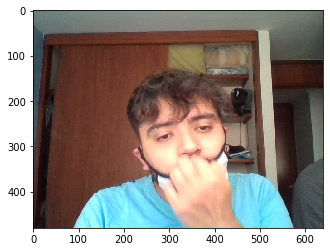

Si lleva mascara


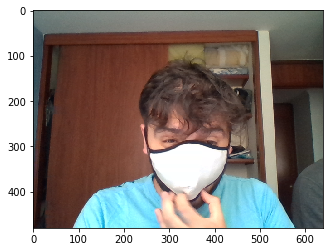

Si lleva mascara


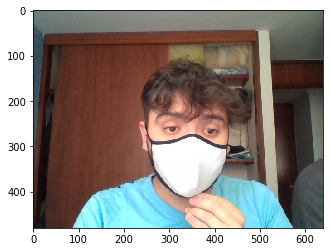

Si lleva mascara


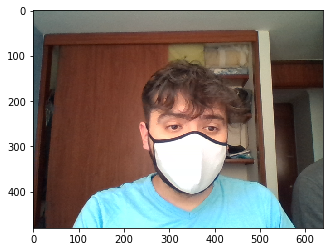

Si lleva mascara


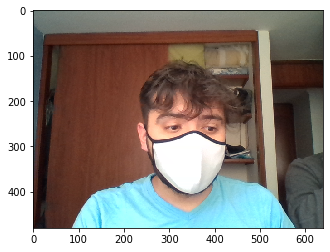

Si lleva mascara


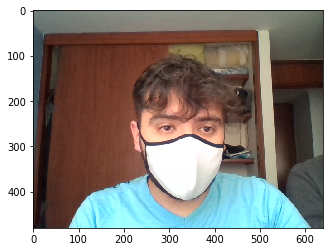

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [18]:
vc = cv2.VideoCapture(0)
plt.ion()

if vc.isOpened():
    is_capturing, frame = vc.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame)
else:
    is_capturing = False

while is_capturing:
    try:
        is_capturing, frame = vc.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_res = cv2.resize(frame, dsize=(150,150),interpolation=cv2.INTER_CUBIC)
        x=image.img_to_array(frame_res)
        x=np.expand_dims(x, axis=0)
        images = np.vstack([x])
        classes = model.predict(images, batch_size=10)
        if classes[0]>0:
            print("No Lleva mascara")
        else:
            print("Si lleva mascara")
        webcam_preview = plt.imshow(frame)
        try:
            plt.pause(1)
        except Exception:
            pass
    except KeyboardInterrupt:
        vc.release()
    

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [20]:
open("mask_classifier_2.tflite","wb").write(tflite_model)

37981176